# 1.0 OVERVIEW

This project consists of four main sections:

1. An Introduction to the real-world dataset and the datasets I will be attempting to synthesise.

2. Explaratory Data Analysis of the realword dataset and commentary on the relationships between the variables and their properties

3. A first simulated dataset created using the Numpy's *".random"* package.

4. A second simulated dataset created using Regression Analysis to model/predict changes to a one variable based on increases to other related varaible.

# 2.0 INTRODUCTION TO THE DATASET

## 2.1 Background on the Real-World Dataset / Phenomenon

The real-world phenomenon I have chosen to base this project around is the number of Livechats the Customer Service Team in my place of work recieves on a weekly basis. 

I work for a company based in Ireland that provides procurement and supplier data management software to various type of organisations around the world. 

The software / application is a web-based platform where "Buyers" of provide and services can interact with "Suppliers" by sending them "Requests" for information about the Supplier's business or for quotes and estimates on the products of services they provide. In order to engage with eachother, both sets of users must register on the system and create an account.

The Customer Service Team provide technical support on how to use the system for both sets of users. The most common channel Users avail of for getting in touch with the Customer Service Team is the application's Livechat function. Each page on our products marketing website and each page in the application itself has a Livechat widget that allows Users to type questions and recieve answers from a member of the Customer Service Team. 

As you will see when we begin to look at the dataset below, we are currently a small enough company with a relatively low volume of Livechats, but they still take up a lot of the Customer Service Team time dealing with them. 

In this project I have attempted to:

1. Identify what variables influence the number of Livechats and to what degree.

2. Create a synthetic "Average Week" of activity on the application and the number of Livechats.

3. Create three simulated datassets that look a the possible increase in the volume of Livechats if the volume of the other varaibles that influence the number of Livechats increased. 

## 2.2 The Real-World Dataset & it's Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/ConorHogan/PFDA-Project/master/LivechatDOW.csv"
live_chat = pd.read_csv(url)
live_chat.head()

,Day,Hour,Livechat,PublishedCount,SuppliersInvitedCount,DeadlineCount,SupplierDeadlineCount,CombinedRequests,CombinedSupplierAction,NewUserMail,NonRegMail
0,1,0,0,0,0,0,0,0,0,4,76
1,1,1,0,0,0,10,14,10,14,1,48
2,1,2,0,0,0,0,0,0,0,2,7
3,1,3,0,0,0,0,0,0,0,0,6
4,1,4,1,26,26,29,33,55,59,0,194


In [3]:
live_chat.tail()

,Day,Hour,Livechat,PublishedCount,SuppliersInvitedCount,DeadlineCount,SupplierDeadlineCount,CombinedRequests,CombinedSupplierAction,NewUserMail,NonRegMail
163,7,19,0,0,0,0,0,0,0,2,4
164,7,20,0,0,0,0,0,0,0,1,2
165,7,21,0,0,0,0,0,0,0,0,19
166,7,22,0,0,0,0,0,0,0,3,18
167,7,23,0,0,0,0,0,0,0,0,53


In [4]:
lc_summary = live_chat.describe()
lc_summary.drop(["Day", "Hour"], axis=1)

,Livechat,PublishedCount,SuppliersInvitedCount,DeadlineCount,SupplierDeadlineCount,CombinedRequests,CombinedSupplierAction,NewUserMail,NonRegMail
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,9.833333,19.619048,49.744048,20.958333,44.791667,40.577381,94.535714,21.011905,956.005952
std,15.269502,22.063547,81.169668,42.131581,77.591349,54.991507,132.941250,24.878143,1884.525098
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,1.000000,2.000000,1.000000,2.000000,3.750000,5.750000,3.000000,70.250000
50%,1.000000,9.500000,22.000000,8.000000,14.500000,20.000000,40.500000,9.000000,205.000000
75%,16.000000,35.000000,68.500000,29.000000,59.000000,67.000000,143.000000,37.250000,1463.250000
max,59.000000,95.000000,638.000000,480.000000,533.000000,521.000000,723.000000,88.000000,16755.000000


As you can see above the dataset consists of 11 variables with 168 rows data. 

The data is an week broken down hour by hour. Each of the "Days" has been given a number with 1 denoting Sunday and 7 denoting Saturday. The hours per day have been listed ranging from 0 (Midnight-1am) to 23 (11pm-Midnight). 

The other variables are counts of the number of time each "event" happened in the hourly period.

**Important Note:** This dataset was created by combining six months worth of data from the period the 1/May/2018 to 31/October/2018. Therefore the counts under each variable are not a single hours data from a day or week. They are the sum of the counts from six months of data. For example, if you look at the Max value for Livechats, in all likelyhood there was never an hour on a given with 59 livechats.

In [5]:
#locate the max livechat row
live_chat_ind = live_chat.set_index("Day")
livechat_max = live_chat_ind[live_chat_ind['Livechat']==live_chat_ind['Livechat'].max()]
livechat_max

,Hour,Livechat,PublishedCount,SuppliersInvitedCount,DeadlineCount,SupplierDeadlineCount,CombinedRequests,CombinedSupplierAction,NewUserMail,NonRegMail
Day,,,,,,,,,,
5,10,59,50,374,37,59,87,433,72,2330


Later we will be looking at the averages per day over the time period when creating the simulated datasets. 

### 2.2.1 Description of the Variables 

Below is a description of the 9 remaining variables. The main variable we will be focused on the is the number of Livechats per hour. The other 8 variables are various types of activity on the application that could cause a User to initiate a Livechat. Please excuse the longwinded names.

We have users based all over the world, but most users are based in the UK and Ireland. We have other significant groups of users based in the U.A.E, Singapore, and Australia. You will notice that there lulls in the number of livechats and other activity at particular times that line-up with activity in these countries.

#### 2.2.1.1 Livechat

This is the number of livechats initiated per hour. As I have said above, Users can start a Livechat with members of the Customer Service Team using a widget on our Marketing Website or on the application itself. Just because a livechat is iniated by a User does not necessarily mean it will be picked up and answered. In fact our Customer Service hours are 7am - 6pm GMT Monday to Friday. Livechat that are iniated outside of these hours are still tracked, and the User has the option to leave a message that can be picked up later or converted into a ticket. 

#### 2.2.1.2 PublishedCount

This is the number of "Requests" published in each hour. A "Request" is basically a questionnaire sent from a Buyer user to a Supplier user. It could be asking the Supplier for information about their company so they could make a decision on whether to do business with them, or it could be asking for quotes for performing a service / providing a product. 

The length and complexity of a Request can vary greatly and I would assume that this would increase the number of possible livechat as there is a variation in the chance for a supplier to be confused by a question or something to go wrong in the features used when building the request. Unfortunetly this data was not available, so I am forced to just examine the raw number of requests published.

#### 2.2.1.3 SuppliersInvitedCount

Multiple Suppliers can be invited to each request. One would assume that the greater if more Suppliers are invited, there are more users interacting with the application and therefore there is a greater chance of there being a Livechat. 

One thing worth noting is that a Request can be published as an "Open" Request with no Suppliers invited at the time of publication. Suppliers can instead find the Request and join at any point before the deadline. 

#### 2.2.1.4 DeadlineCount

This is the count of the number of Requests coming to an end in each hour. This may influence the number of Livechats as Suppliers scramble to complete and submit close to the deadline.

#### 2.2.1.5 SupplierDeadlineCount

This is the count of the number of Supplier who were invited to or have joined a Request at the time of the deadline. As I stated above, the number of Suppliers associated with a Request can increase at any point up to the the deadline as more join or are invited.

It would have been interesting to look at the number of suppliers who were still working on their response in the hour before the deadline, but unfortunately that data was not available.

#### 2.2.1.6 CombinedRequests

This is the combined count of the number of Request starting and ending in a hourly period. I have included this in some of the initial exploration of the data, but it is dropped later.

#### 2.2.1.7  CombinedSupplierAction

Similar to the above, this is the combined number of Supplier invited to Requests that have just been published along with the number of Suppliers associated with a Request that had a deadline in the hourly period.

#### 2.2.1.8 NewUserMail

This is the count of mails issued to User who have registered on the system in that hour. Both new Buyer users and new Supplier users get a mail asking them to click on a link to verify their account and create a password. It is this specific mail being counted here. Users tend to have more questions when interacting with the system for the first time, which I would assume results in Livechats.

#### 2.2.1.9 NonRegMail

This is the count of all other mails sent in each hour. Mails are mostly commonly notifications from the system reminding users about deadlines, certifications and insurance details that need to be updated, contracts that are expiring, suppliers responses that need to be reviewed. These tend to trigger an action from a User with the system. I would assume that as interation with the system goes up, so does the chance of a Livechat.

# 3.0 EXPLARATORY DATA ANALYSIS

In this section I will take an in-depth look at the real-world dataset and its properties so that I can better simulate it. It is worth noting again that the data is the aggregate of six months worth of daily / hourly data and I will be using this to create a single simulated week's worth of data representing an average week. It is therefore important to investigate the difference in activity from day to day and hour to hour to get create the most accurate  simulation possible.

Most of what I have said above relates to the first dataset I will be trying to create, which the "average week". For the second dataset I will be creating which will look at a simulated increase in activity, it is also important to look at the various variables influence on the number of Livechats.

## 3.1 Relationship Between Day of the Week and System Activity

Most of our customers are based in the UK and Ireland and work Monday to Friday. However, there are customers based in the Middle East who work Sunday to Thursday. Generally speaking customers are not very active on Saturdays. While none of the Customer Service team work on weekends to answer Livechats, users can still access the Livechat function and leave a message. It is worth examing the data for the entire and getting a view of an average week to access if staff would be needed to cover weekends in the future. 

In [6]:
DOW_groupby = live_chat.groupby("Day").sum()
DOW_groupby

,Hour,Livechat,PublishedCount,SuppliersInvitedCount,DeadlineCount,SupplierDeadlineCount,CombinedRequests,CombinedSupplierAction,NewUserMail,NonRegMail
Day,,,,,,,,,,
1,276,9,258,272,224,270,482,542,102,6281
2,276,318,601,1279,483,1254,1084,2533,714,24465
3,276,334,719,2203,621,1337,1340,3540,736,30777
4,276,334,753,1877,620,1367,1373,3244,754,27292
5,276,361,569,1626,959,1385,1528,3011,639,40318
6,276,293,392,1084,588,1885,980,2969,539,27297
7,276,3,4,16,26,27,30,43,46,4179


**Livechat per day**

As we can see below, the number of livechats per day remains fairly consistent on weekdays and then drops off massively on weekends. 

Text(0,0.5,'Sum of Chats')

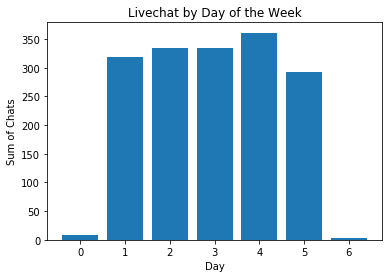

In [7]:
day_series = DOW_groupby.index.values
livechat_by_DOW = DOW_groupby["Livechat"].values
y_pos = np.arange(len(day_series))

pyplt.bar(y_pos, livechat_by_DOW)
pyplt.title("Livechat by Day of the Week")
pyplt.xlabel("Day")
pyplt.ylabel("Sum of Chats")

**CombinedActions per Day**

There is slightly more variation in the number of combined Supplier invitations and deadlines per day. There is a relatively high amount of activity on Sundays with a small dip on Mondays. The Sunday activity can be explained by our Middle East based customers. The dip on Mondays is more than likely due a relatively low number of Deadlines falling on a Monday. We also encourage users to publish new requests on Tuesdays which is refected in that being the busiest day.

Text(0,0.5,'Sum of Invited')

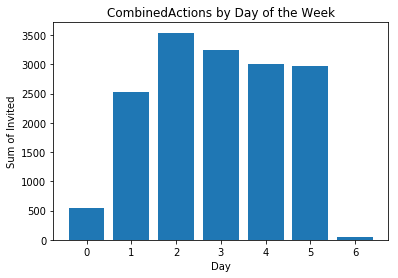

In [8]:
combinv_by_DOW = DOW_groupby["CombinedSupplierAction"].values

pyplt.bar(y_pos, combinv_by_DOW)
pyplt.title("CombinedActions by Day of the Week")
pyplt.xlabel("Day")
pyplt.ylabel("Sum of Invited")

**Combined Requests**

The numbers below are also as I would expect. We encourage users to set request deadlines for Thursdays in order to lessen the possibility of being inundated with Customer Service Support request on Friday evenings. 

Text(0,0.5,'Sum of Requests')

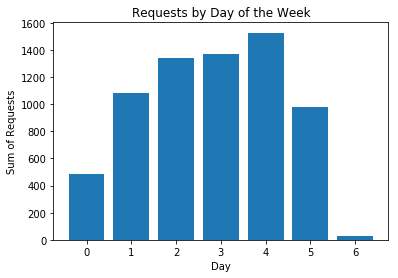

In [9]:
combreq_by_DOW = DOW_groupby["CombinedRequests"].values

pyplt.bar(y_pos, combreq_by_DOW)
pyplt.title("Requests by Day of the Week")
pyplt.xlabel("Day")
pyplt.ylabel("Sum of Requests")

**New User Registrations**

In this variables case the week is more frontloaded. I don't have a good explaination for this other than people might leave request till the start of the next week to tackle.

Text(0,0.5,'Sum of New User Mails')

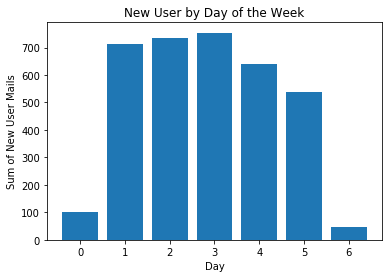

In [10]:
newuser_by_DOW = DOW_groupby["NewUserMail"].values

pyplt.bar(y_pos, newuser_by_DOW)
pyplt.title("New User by Day of the Week")
pyplt.xlabel("Day")
pyplt.ylabel("Sum of New User Mails")

**Other Mails**

This variable shows the most variation between the days including, relatively the most Sunday activity. The increase of emails on Thursdays could be explained by an increase in reminder emails for deadlines as well as expiring Certificates (ISO9001, ISO270001, insurance details) which are scheduled to send on Thursdays. 

Text(0,0.5,'Sum of Other Mails')

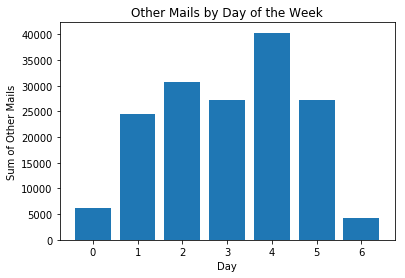

In [11]:
nonregmail_by_DOW = DOW_groupby["NonRegMail"].values

pyplt.bar(y_pos, nonregmail_by_DOW)
pyplt.title("Other Mails by Day of the Week")
pyplt.xlabel("Day")
pyplt.ylabel("Sum of Other Mails")


### 3.1.1 Daily Comparison - Conclusion

As expected there is a lot of variation between the different days of the week. However, I was not expecting the patterns to differ so much of the different variables. In any case we will have to simulate the distributions for each day seperately and then combine the data to create a week rather than using the same average for all days. 

## 3.2 Relationship Between Hour of the Day and System Activity

It also needs to be confirmed if there is a large variation in the distribution of activity throughout the day. If each hour differs greatly we will have to calculate the distribution for each day independently of the other.

In [12]:
# Groupt the variables by hour of the day and sum
HOD_groupby = live_chat.groupby("Hour").sum()
HOD_groupby

,Day,Livechat,PublishedCount,SuppliersInvitedCount,DeadlineCount,SupplierDeadlineCount,CombinedRequests,CombinedSupplierAction,NewUserMail,NonRegMail
Hour,,,,,,,,,,
0,28,3,18,31,33,76,51,107,58,644
1,28,6,40,155,64,78,104,233,60,1277
2,28,7,58,126,13,33,71,159,53,1120
3,28,13,110,249,33,56,143,305,60,987
4,28,3,199,321,271,601,470,922,44,1452
5,28,9,179,227,114,138,293,365,79,1260
6,28,49,202,282,173,267,375,549,118,2378
7,28,68,148,338,69,111,217,449,212,4199
8,28,159,317,683,128,236,445,919,330,10510


As wee can see below there is indeed a large variation in activity from hour to hour throughout the course of the day. I would expect there to be a difference between the early morning / night and office hours, but there is still a good degree of variation with office hours. There is a general trend of spikes either side of lunch, but no other set pattern that each of the variables follow withing office hours.

Text(0,0.5,'Sum of Chats')

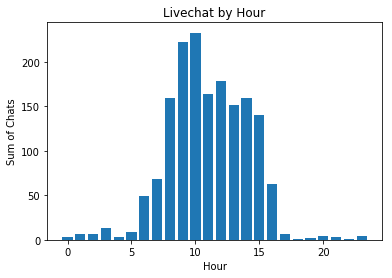

In [13]:
hour_series = HOD_groupby.index.values
livechat_by_HOD = HOD_groupby["Livechat"].values
y_posH = np.arange(len(hour_series))

pyplt.bar(y_posH, livechat_by_HOD)
pyplt.title("Livechat by Hour")
pyplt.xlabel("Hour")
pyplt.ylabel("Sum of Chats")

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


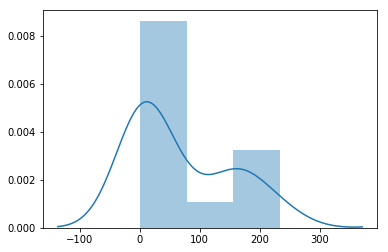

In [14]:
sns.distplot(livechat_by_HOD)

Text(0,0.5,'Sum of Requests')

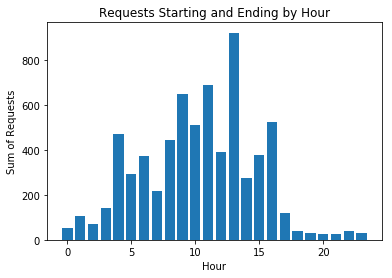

In [15]:
requests_by_HOD = HOD_groupby["CombinedRequests"].values

pyplt.bar(y_posH, requests_by_HOD)
pyplt.title("Requests Starting and Ending by Hour")
pyplt.xlabel("Hour")
pyplt.ylabel("Sum of Requests")

Text(0,0.5,'Sum of Invited')

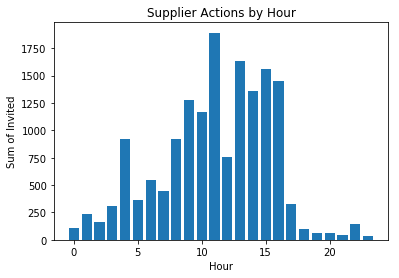

In [16]:
actions_by_HOD = HOD_groupby["CombinedSupplierAction"].values

pyplt.bar(y_posH, actions_by_HOD)
pyplt.title("Supplier Actions by Hour")
pyplt.xlabel("Hour")
pyplt.ylabel("Sum of Invited")

Text(0,0.5,'Sum of Mails')

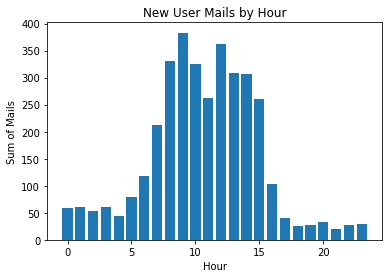

In [17]:
newusermail_by_HOD = HOD_groupby["NewUserMail"].values

pyplt.bar(y_posH, newusermail_by_HOD)
pyplt.title("New User Mails by Hour")
pyplt.xlabel("Hour")
pyplt.ylabel("Sum of Mails")

Text(0,0.5,'Sum of Mails')

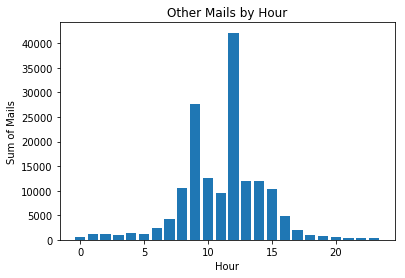

In [18]:
nonregmail_by_HOD = HOD_groupby["NonRegMail"].values

pyplt.bar(y_posH, nonregmail_by_HOD)
pyplt.title("Other Mails by Hour")
pyplt.xlabel("Hour")
pyplt.ylabel("Sum of Mails")

### 3.2.1 Hourly Comparison - Conclusion

As we have seen, there is a great variation day by and hour by hour. Also patterns, distributions are not consistent across the variables. We will therefore have to simulate our data, hour by hour, day by day, and variable by variable.

## 3.3 View of Relationships Between Variables Over Time

The below line charts show changes in the variables values hour by hour and day by day. By looking at these graphs we can gain understanding of which variables most closely mirror or look like they influencing the number of Livechats

**Livechats & New User Registrations**

There seems to be a strong relationship here. This could be a coincidence, but we will see below that they highly positively corrolated.

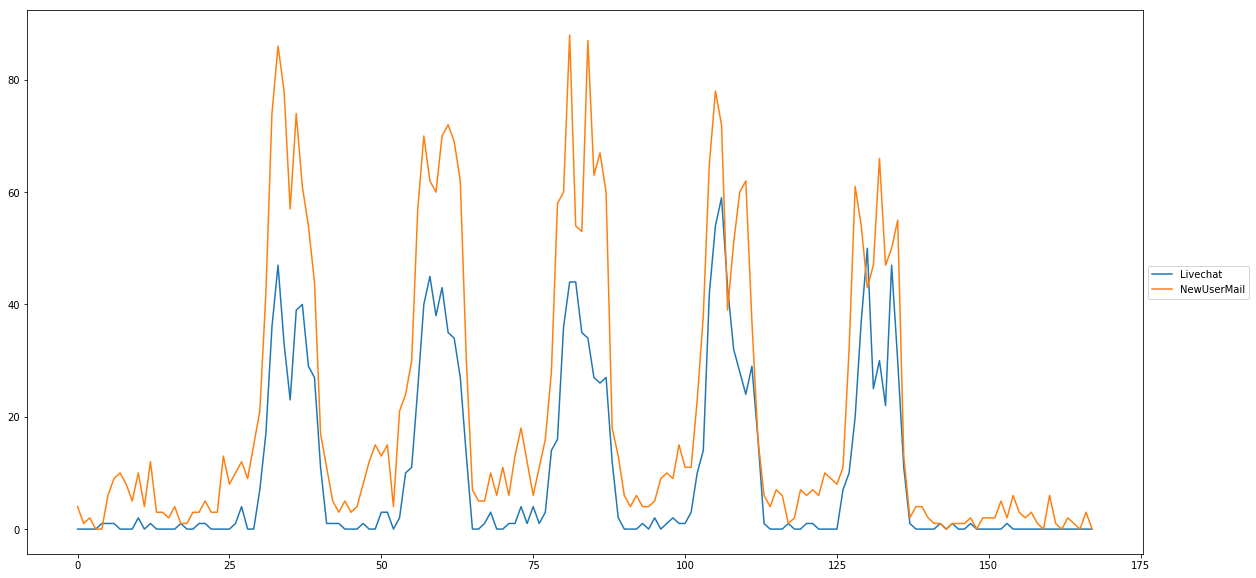

In [19]:
ax = live_chat[["Livechat","NewUserMail"]].plot(figsize=(20,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

**Livechats and Published Requests**

Looking a the graph below it would seem that there is an upswing in the number of Livechats after a new Request is published.

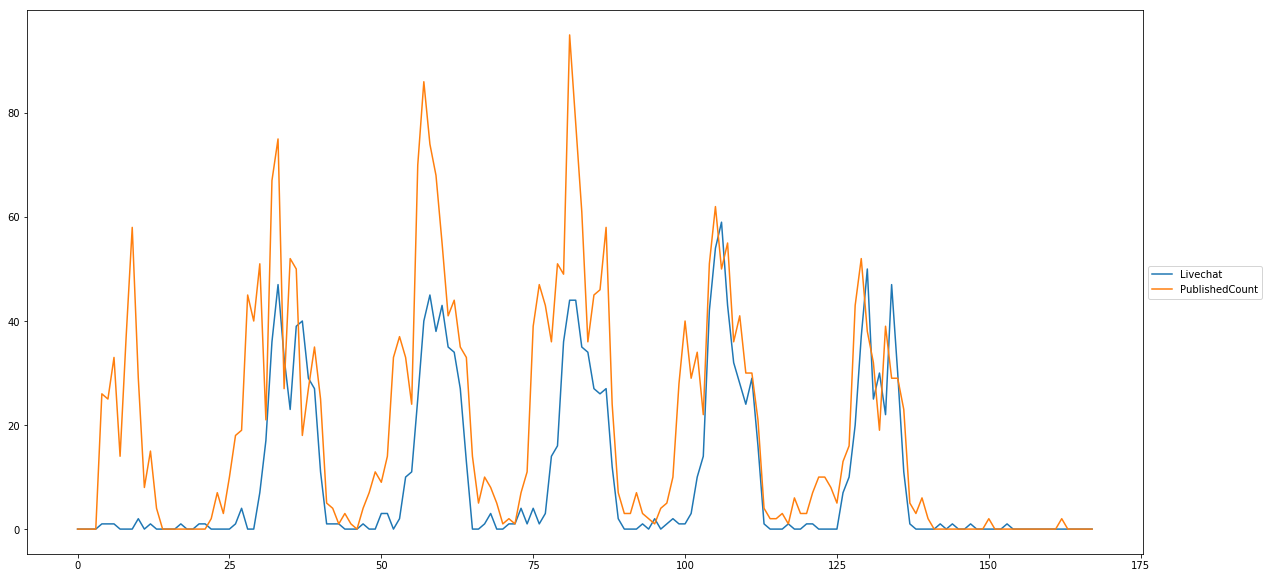

In [20]:
ax = live_chat[["Livechat","PublishedCount"]].plot(figsize=(20,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

**Livechat and Invited Suppliers**

Massive spike on Tuesdays is not entirely unexpected. We often encourage customers to publish reqeusts where they are onboarding their supply chains on Tuesdays. 

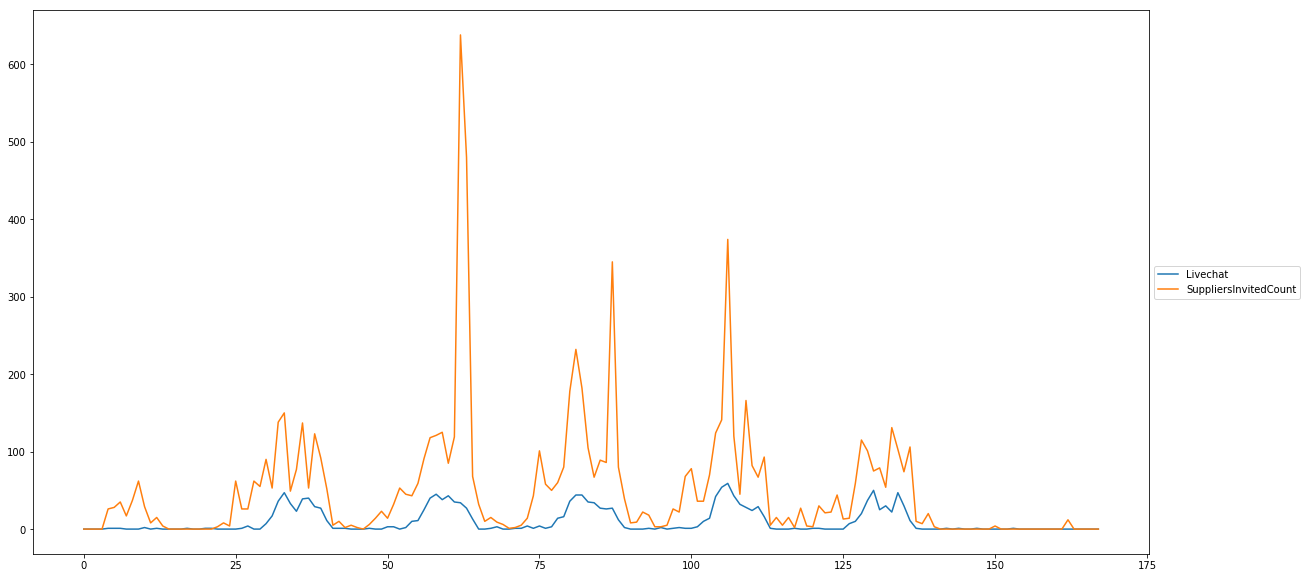

In [21]:
ax = live_chat[["Livechat","SuppliersInvitedCount"]].plot(figsize=(20,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

**Livechat & Deadlines**

Massive spike on Thursdays is also to be expected. We have Middle East based customer who is responsible for publishing large amounts of requests as part of their supplier registration process. Each supplier might recieve 4 different requests from this one customer. These tend to close on a Thursday as the weekend in the Middle East is Friday and Saturday. However, it is interesting to note that this does not result in a large upswing in Livechats. Presumably, the suppliers have done what they need to do a this stage.

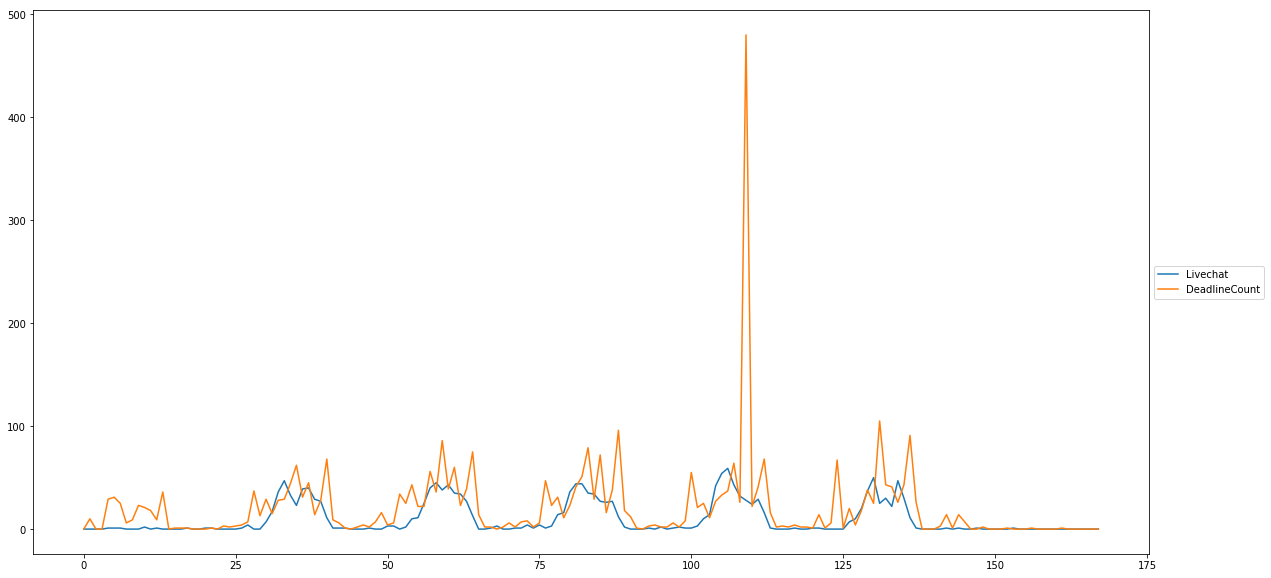

In [22]:
ax = live_chat[["Livechat","DeadlineCount"]].plot(figsize=(20,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

### 3.3.1 Relationships Overtime - Conclusion

There seems to be a positive relationship between the number of Livechats and other variables over time. We will at this more closely by calculating corrolation and through linear regression below.

## 3.4 Corrolation and Linear Regression

In the below sections we will see which variables have the most influence on the number of livechats and best predict the number of livechats that will occur. We will then use this to select the variables we use in the activity increase models. 

### 3.4.1 Corrolation

As we can see in the below corrolation table and corrolation heatmap, all of the variables (not including hour and day) have a positive corrolation with the number of Livechats.

In [23]:
lc_corr = live_chat.corr()
lc_corr

,Day,Hour,Livechat,PublishedCount,SuppliersInvitedCount,DeadlineCount,SupplierDeadlineCount,CombinedRequests,CombinedSupplierAction,NewUserMail,NonRegMail
Day,1.000000,0.000000,-0.008015,-0.179942,-0.063806,-0.003259,0.022352,-0.074693,-0.025912,-0.073793,0.014096
Hour,0.000000,1.000000,-0.045864,-0.241421,-0.067998,-0.037636,-0.008787,-0.125697,-0.046646,-0.104177,-0.023836
Livechat,-0.008015,-0.045864,1.000000,0.782965,0.666309,0.393666,0.464363,0.615745,0.677853,0.932075,0.707275
PublishedCount,-0.179942,-0.241421,0.782965,1.000000,0.647514,0.409971,0.464122,0.715316,0.666237,0.806586,0.524166
SuppliersInvitedCount,-0.063806,-0.067998,0.666309,0.647514,1.000000,0.331686,0.402064,0.513914,0.845233,0.685207,0.398718
DeadlineCount,-0.003259,-0.037636,0.393666,0.409971,0.331686,1.000000,0.832608,0.930635,0.688470,0.404578,0.248604
SupplierDeadlineCount,0.022352,-0.008787,0.464363,0.464122,0.402064,0.832608,1.000000,0.824114,0.829139,0.473573,0.271595
CombinedRequests,-0.074693,-0.125697,0.615745,0.715316,0.513914,0.930635,0.824114,1.000000,0.794775,0.633582,0.400772
CombinedSupplierAction,-0.025912,-0.046646,0.677853,0.666237,0.845233,0.688470,0.829139,0.794775,1.000000,0.694767,0.401961
NewUserMail,-0.073793,-0.104177,0.932075,0.806586,0.685207,0.404578,0.473573,0.633582,0.694767,1.000000,0.694883


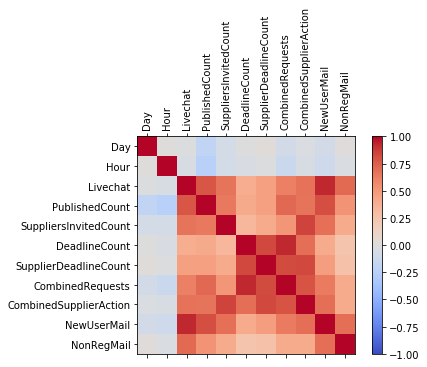

In [24]:
lc_corrfig = pyplt.figure()
ax = lc_corrfig.add_subplot(111)
cax = ax.matshow(lc_corr,cmap='coolwarm', vmin=-1, vmax=1)
lc_corrfig.colorbar(cax)
ticks = np.arange(0,len(live_chat.columns),1)
ax.set_xticks(ticks)
pyplt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(live_chat.columns)
ax.set_yticklabels(live_chat.columns)
pyplt.show()

We can see the relationships even more clearly using the Linear Regression plots below.

#### Livechat & PublishedCount

Corrolation is above 0.5 (0.78) indicating a strong corrolation. Simply put, if more requests are published, there are more livechats. This is also evidence in the graph below. 

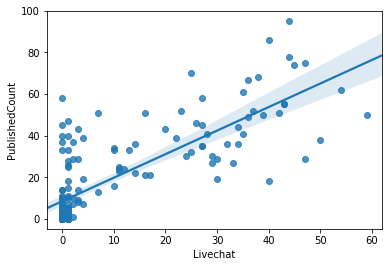

In [25]:
sns.regplot(x=live_chat["Livechat"], y=live_chat["PublishedCount"])

#### Livechat & SuppliersInvitedCount

Corrolation is aslo high (0.66). Again, shows that as the number of Suppliers invited increases the number of Livechats increases, but not at the same rate as for requests. There are also a few signficant outliers that are possibly showing a higher corrolation than there is in reality. 

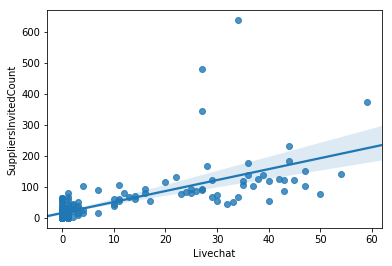

In [26]:
sns.regplot(x=live_chat["Livechat"], y=live_chat["SuppliersInvitedCount"])

#### Livechat & SupplierDeadlineCount

Again, while these two are positively corrolated (0.46), the corrolation is weaker than for the number of suppliers invited to newly published requests.

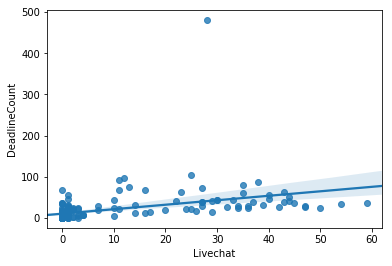

In [27]:
sns.regplot(x=live_chat["Livechat"], y=live_chat["DeadlineCount"])

#### Livechat & NewUserMail

The strongest relationship to the number of Livechats of all is the number of new users registering on the system (0.93). This is not very suprising as users are most likely to experience issues or need help in general when they use the system for the first time.

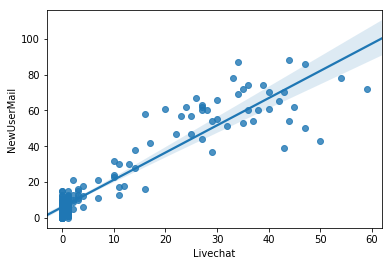

In [28]:
sns.regplot(x=live_chat["Livechat"], y=live_chat["NewUserMail"])

#### Livechat & NonRegMail

Remember that NonRegMail is all emails sent from the systems to both Supplier Users and Buyer Users excluding emails issued when a new user creates an account. Correlation here is also high at 0.71.

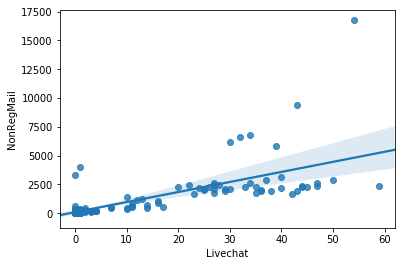

In [29]:
sns.regplot(x=live_chat["Livechat"], y=live_chat["NonRegMail"])

### 3.4.2 Corrolation & Linear Regression Conclusion

The four best predictors of the number of Livechats would seem to be:

1. NewUserMail with a corrolation coefficient of 0.93
2. PublishedCount with a corrolation coefficent of 0.78
3. NonRegMail with a corrolation coefficient of 0.71
4. SuppliersInvited with a corrolation coefficient of 0.66

We will use these as our variables for activity increase modelling in section 5.

## 4.0 Simulated Dataset 1 - An Average Week's Activity

In this sections I will synthesise a dataset that approximates what an average week of activity for our variables looks like. 

As I showed, in the Explaratory Data Analysis above, there is a great variation in activity from day to day and from hour to hour. We will therefore have to calculate the probability distribution for each hour in each day independently. 

I will be using a ***Poisson Distribution*** to simulate the data for each variable. The Poisson distribution is the best model for each of the variables as:

1. Each of the events can occur any number of times during a time period.
2. Events within each variable occur independently of eachother.
3. The rate of occurance is constant with each hour per day. This may not necessarily be true, but it's still the best approach for this data.
4. The probability of an event occuring is proportional to the time period. Again this is not true, but Poisson is stil the best distribution for this simulation.

### 4.1 Steps for Creating the Dataset

In [30]:
# create a slimmed down dataset minus the combined columns
live_chat_2 = live_chat.drop(["CombinedRequests", "CombinedSupplierAction"], axis=1)
live_chat_2.head()

,Day,Hour,Livechat,PublishedCount,SuppliersInvitedCount,DeadlineCount,SupplierDeadlineCount,NewUserMail,NonRegMail
0,1,0,0,0,0,0,0,4,76
1,1,1,0,0,0,10,14,1,48
2,1,2,0,0,0,0,0,2,7
3,1,3,0,0,0,0,0,0,6
4,1,4,1,26,26,29,33,0,194


Since the Poisson Distribution uses an average as it's input we need to calculate an average for a single day. We can do that by dividing each number in the the above dataframes by the number of times that day of the week occured in the time period the data was aggregated for. As I mentioned above, the original dataset consists of totals for the 1st of May 2018 to the 31st of October 2018. There were the following number of each day in that time period:
* Mondays = 26
* Tuesdays = 27
* Wednesdays = 27
* Thursdays = 26
* Fridays = 26
* Saturdays = 26
* Sundays = 26

Therefore we need to create the below dataframes:

In [31]:
Sunday = live_chat_2.loc[live_chat_2["Day"]==1]
Monday = live_chat_2.loc[live_chat_2["Day"]==2]
Tuesday = live_chat_2.loc[live_chat_2["Day"]==3]
Wednesday = live_chat_2.loc[live_chat_2["Day"]==4]
Thursday = live_chat_2.loc[live_chat_2["Day"]==5]
Friday = live_chat_2.loc[live_chat_2["Day"]==6]
Saturday = live_chat_2.loc[live_chat_2["Day"]==7]

We can then divide each variables' value by the appropriate number of days, to get the average per day figure.

In [32]:
Sun_D = Sunday.divide(26).drop(["Day","Hour"],axis=1)
Mon_D = Monday.divide(27).drop(["Day","Hour"],axis=1)
Tues_D = Tuesday.divide(27).drop(["Day","Hour"],axis=1)
Wed_D = Wednesday.divide(26).drop(["Day","Hour"],axis=1)
Thurs_D = Thursday.divide(26).drop(["Day","Hour"],axis=1)
Fri_D = Friday.divide(26).drop(["Day","Hour"],axis=1)
Sat_D = Saturday.divide(26).drop(["Day","Hour"],axis=1)


Day and Hour were dropped from the above to prevent them being divided into nonsense numbers and being passed through the *np.random.poisson* function.

We can then use the *applymap* fuction to run each averaged datapoint in the dataframe through *np.random.poisson* function.

In [33]:
Sun_D = Sun_D.applymap(np.random.poisson)
Mon_D = Mon_D.applymap(np.random.poisson)
Tues_D = Tues_D.applymap(np.random.poisson)
Wed_D = Wed_D.applymap(np.random.poisson)
Thurs_D = Thurs_D.applymap(np.random.poisson)
Fri_D = Fri_D.applymap(np.random.poisson)
Sat_D = Sat_D.applymap(np.random.poisson)


In [34]:
Wed_D.head()

,Livechat,PublishedCount,SuppliersInvitedCount,DeadlineCount,SupplierDeadlineCount,NewUserMail,NonRegMail
72,0,0,0,0,1,1,4
73,0,0,2,0,1,0,7
74,0,0,2,0,0,0,8
75,0,4,1,0,0,0,9
76,0,3,1,7,5,0,12


We can then add back in the Days and Hours columns to complete the simulated days.

In [35]:
Sun_D["Day"] = Sunday["Day"]
Sun_D["Hour"] = Sunday["Hour"]
Mon_D["Day"] = Monday["Day"]
Mon_D["Hour"] = Monday["Hour"]
Tues_D["Day"] = Tuesday["Day"]
Tues_D["Hour"] = Tuesday["Hour"]
Wed_D["Day"] = Wednesday["Day"]
Wed_D["Hour"] = Wednesday["Hour"]
Thurs_D["Day"] = Thursday["Day"]
Thurs_D["Hour"] = Thursday["Hour"]
Fri_D["Day"] = Friday["Day"]
Fri_D["Hour"] = Friday["Hour"]
Sat_D["Day"] = Saturday["Day"]
Sat_D["Hour"] = Saturday["Hour"]

In [36]:
Sun_D.columns.values

array(['Livechat', 'PublishedCount', 'SuppliersInvitedCount',
       'DeadlineCount', 'SupplierDeadlineCount', 'NewUserMail',
       'NonRegMail', 'Day', 'Hour'], dtype=object)

In [37]:
Sun_D = Sun_D[["Day", "Hour", "Livechat", "PublishedCount", "SuppliersInvitedCount", "DeadlineCount", "SupplierDeadlineCount","NewUserMail", "NonRegMail"]]
Mon_D = Mon_D[["Day", "Hour", "Livechat", "PublishedCount", "SuppliersInvitedCount", "DeadlineCount", "SupplierDeadlineCount","NewUserMail", "NonRegMail"]]
Tues_D = Tues_D[["Day", "Hour", "Livechat", "PublishedCount", "SuppliersInvitedCount", "DeadlineCount","SupplierDeadlineCount","NewUserMail", "NonRegMail"]]
Wed_D = Wed_D[["Day", "Hour", "Livechat", "PublishedCount", "SuppliersInvitedCount", "DeadlineCount", "SupplierDeadlineCount","NewUserMail", "NonRegMail"]]
Thurs_D = Thurs_D[["Day", "Hour", "Livechat", "PublishedCount", "SuppliersInvitedCount", "DeadlineCount", "SupplierDeadlineCount","NewUserMail", "NonRegMail"]]
Fri_D = Fri_D[["Day", "Hour", "Livechat", "PublishedCount", "SuppliersInvitedCount", "DeadlineCount", "SupplierDeadlineCount","NewUserMail", "NonRegMail"]]
Sat_D = Sat_D[["Day", "Hour", "Livechat", "PublishedCount", "SuppliersInvitedCount", "DeadlineCount", "SupplierDeadlineCount","NewUserMail", "NonRegMail"]]


Finally, we can merge each simulated day together to create a simulated week.

In [38]:
day_frames = [Sun_D, Mon_D, Tues_D, Wed_D, Thurs_D, Fri_D, Sat_D]

In [39]:
simulated_week = pd.concat(day_frames)

### 4.2 Output - Simulated Week Dataframe

In [40]:
simulated_week

,Day,Hour,Livechat,PublishedCount,SuppliersInvitedCount,DeadlineCount,SupplierDeadlineCount,NewUserMail,NonRegMail
0,1,0,0,0,0,0,0,0,4
1,1,1,0,0,0,2,3,0,2
2,1,2,0,0,0,0,0,0,0
3,1,3,0,0,0,0,0,0,0
4,1,4,0,1,0,0,0,0,4
5,1,5,0,1,2,0,0,0,13
6,1,6,0,1,1,1,1,0,7
7,1,7,0,1,0,0,0,1,2
8,1,8,0,0,3,0,0,1,16
9,1,9,0,1,2,1,0,0,6


Remember that the below figures are for a week's worth of data rather than the 6 months worth of data in the original "live_chat" dataset.

In [41]:
simulated_week.drop(["Day","Hour"], axis=1).describe()

,Livechat,PublishedCount,SuppliersInvitedCount,DeadlineCount,SupplierDeadlineCount,NewUserMail,NonRegMail
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.380952,0.654762,1.916667,0.821429,1.785714,0.720238,36.410714
std,0.810186,1.178592,3.285637,1.815837,3.438324,1.247395,72.555849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000
75%,0.000000,1.000000,2.250000,1.000000,2.000000,1.000000,50.500000
max,4.000000,6.000000,23.000000,18.000000,21.000000,7.000000,643.000000


In [42]:
simulated_week.drop(["Day","Hour"], axis=1).corr()

,Livechat,PublishedCount,SuppliersInvitedCount,DeadlineCount,SupplierDeadlineCount,NewUserMail,NonRegMail
Livechat,1.000000,0.295333,0.405653,0.262241,0.362663,0.485293,0.453373
PublishedCount,0.295333,1.000000,0.379107,0.421494,0.274211,0.394161,0.274622
SuppliersInvitedCount,0.405653,0.379107,1.000000,0.362824,0.302129,0.356614,0.380562
DeadlineCount,0.262241,0.421494,0.362824,1.000000,0.666157,0.250107,0.267261
SupplierDeadlineCount,0.362663,0.274211,0.302129,0.666157,1.000000,0.290300,0.261843
NewUserMail,0.485293,0.394161,0.356614,0.250107,0.290300,1.000000,0.375422
NonRegMail,0.453373,0.274622,0.380562,0.267261,0.261843,0.375422,1.000000


In [43]:
live_chat.drop(["Day","Hour","CombinedRequests","CombinedSupplierAction"], axis=1).corr()

,Livechat,PublishedCount,SuppliersInvitedCount,DeadlineCount,SupplierDeadlineCount,NewUserMail,NonRegMail
Livechat,1.000000,0.782965,0.666309,0.393666,0.464363,0.932075,0.707275
PublishedCount,0.782965,1.000000,0.647514,0.409971,0.464122,0.806586,0.524166
SuppliersInvitedCount,0.666309,0.647514,1.000000,0.331686,0.402064,0.685207,0.398718
DeadlineCount,0.393666,0.409971,0.331686,1.000000,0.832608,0.404578,0.248604
SupplierDeadlineCount,0.464363,0.464122,0.402064,0.832608,1.000000,0.473573,0.271595
NewUserMail,0.932075,0.806586,0.685207,0.404578,0.473573,1.000000,0.694883
NonRegMail,0.707275,0.524166,0.398718,0.248604,0.271595,0.694883,1.000000


While there is still a positive corrolation between the number of chats and the other variables it is not as strong as it was in our original "live_chat" dataset covering a 6 month period vs this one synthesized week.

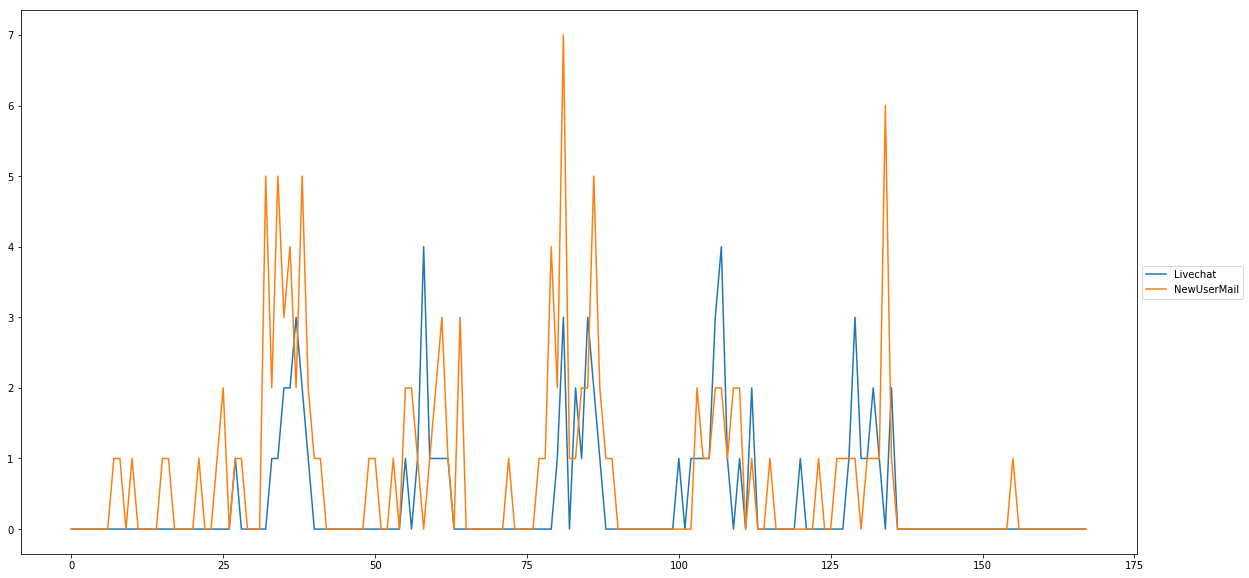

In [44]:
ax = simulated_week[["Livechat","NewUserMail"]].plot(figsize=(20,10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## 5.0 Modelling Activity Increases

In this section we will create a second mock dataset that predicts the count of Livechats if activity increased significatly. What would an average week look like if activity increased by a factor of 5, 10, 20.

In order to do this we will use Linear Regression to look at the influence of 4 of the variables on the number of Livechats by using the original "live_chat" dataset to get the regression coefficients and train our models.

We will then apply this model to each day individually, in the three increased activity scenarios. I'm aware that each of the four variables we are looking at are also interacting with eachother can could have some degree of collinearity, but this could at least give us some rough estimates of what an average week could like for each increase scenerio.

### 5.1 Training the Regression model

In [45]:
Sun_Dalt = Sunday.divide(26).drop(["Day","Hour"],axis=1)
Mon_Dalt = Monday.divide(27).drop(["Day","Hour"],axis=1)
Tues_Dalt = Tuesday.divide(27).drop(["Day","Hour"],axis=1)
Wed_Dalt = Wednesday.divide(26).drop(["Day","Hour"],axis=1)
Thurs_Dalt = Thursday.divide(26).drop(["Day","Hour"],axis=1)
Fri_Dalt = Friday.divide(26).drop(["Day","Hour"],axis=1)
Sat_Dalt = Saturday.divide(26).drop(["Day","Hour"],axis=1)

In [46]:
from sklearn import linear_model

We will base our predictions on the four variables that are most highly corrolated with the number of Livechats. These were:
1. NewUserMail with a corrolation coefficient of 0.93
2. PublishedCount with a corrolation coefficent of 0.78
3. NonRegMail with a corrolation coefficient of 0.71
4. SuppliersInvited with a corrolation coefficient of 0.66

Below I have tested / trained the data using three different Linear regression models. Scikit-Learn has a cheatsheet page for helping to select the correct Regression model here: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html.

This data seemed to most closely match the Lasso and ElasticNet models, but I have also included Ordinary Least Squares Regression below.

In [47]:
regLass = linear_model.Lasso()
regLass.fit(live_chat[["NewUserMail","PublishedCount","NonRegMail","SuppliersInvitedCount"]],live_chat.Livechat)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
regLass.coef_

array([0.44693093, 0.05876259, 0.00108157, 0.01097613])

In [49]:
regElas = linear_model.ElasticNet()
regElas.fit(live_chat[["NewUserMail","PublishedCount","NonRegMail","SuppliersInvitedCount"]],live_chat.Livechat)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
regElas.coef_

array([0.44687093, 0.06044885, 0.00107435, 0.0108343 ])

In [51]:
regLin = linear_model.LinearRegression()
regLin.fit(live_chat[["NewUserMail","PublishedCount","NonRegMail","SuppliersInvitedCount"]],live_chat.Livechat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
regLin.coef_

array([0.4500989 , 0.06065626, 0.00105072, 0.01041581])

It's worth noting the Regression Coefficients above. None are showing as great predictors of what the Livechat value will be, but they are the only values we have to work with. As expected from looking at the corrolation coefficients above, the lmplots, and the line plot comparisons, NewUserMail is the best predictor of the Livechat count, but the other variables are all suprisingly low. 

This count be due not having performed normalization or standardisation on the dataset. For example, NewUserMails and Livechats both correspond to a single person, whereas each request is published to multiple people in most a lot of cases.

### 5.2 Creating the Three Scenarios

In [53]:
live_chat.head()

,Day,Hour,Livechat,PublishedCount,SuppliersInvitedCount,DeadlineCount,SupplierDeadlineCount,CombinedRequests,CombinedSupplierAction,NewUserMail,NonRegMail
0,1,0,0,0,0,0,0,0,0,4,76
1,1,1,0,0,0,10,14,10,14,1,48
2,1,2,0,0,0,0,0,0,0,2,7
3,1,3,0,0,0,0,0,0,0,0,6
4,1,4,1,26,26,29,33,55,59,0,194


In [54]:
live_chat_by5 = live_chat.multiply(5).drop(["Day","Hour","Livechat","DeadlineCount","SupplierDeadlineCount","CombinedRequests","CombinedSupplierAction"],axis=1)
live_chat_by10 = live_chat.multiply(10).drop(["Day","Hour","Livechat","DeadlineCount","SupplierDeadlineCount","CombinedRequests","CombinedSupplierAction"],axis=1)
live_chat_by20 = live_chat.multiply(20).drop(["Day","Hour","Livechat","DeadlineCount","SupplierDeadlineCount","CombinedRequests","CombinedSupplierAction"],axis=1)

In [55]:
live_chat_by5.head()

,PublishedCount,SuppliersInvitedCount,NewUserMail,NonRegMail
0,0,0,20,380
1,0,0,5,240
2,0,0,10,35
3,0,0,0,30
4,130,130,0,970


I'm aware there are a lot of 0 values in the results. Most of these are at times at the early morning, night or weekend where activity is likely not to increase a significant degree anyway and in any case we don't provide livechat cover at these times, so it is safe enough to ignore them.

The columns in the above datasets don't match our regression model so they need to be reordered.

In [56]:
live_chat_by5 = live_chat_by5[["NewUserMail","PublishedCount","NonRegMail","SuppliersInvitedCount"]]
live_chat_by10 = live_chat_by10[["NewUserMail","PublishedCount","NonRegMail","SuppliersInvitedCount"]]
live_chat_by20 = live_chat_by20[["NewUserMail","PublishedCount","NonRegMail","SuppliersInvitedCount"]]

In [57]:
live_chat_by5.head()

,NewUserMail,PublishedCount,NonRegMail,SuppliersInvitedCount
0,20,0,380,0
1,5,0,240,0
2,10,0,35,0
3,0,0,30,0
4,0,130,970,130


In [58]:
regLass.predict([[20,0,380,0]])

array([7.05922505])

In [59]:
regLass.predict([[0,130,970,130]])

array([7.8247692])

### 5.4 Creating Predicted Livechat column

In [60]:
x = live_chat[["NewUserMail","PublishedCount","NonRegMail","SuppliersInvitedCount"]]
y = live_chat["Livechat"]

model = linear_model.Lasso()

model.fit(x, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
Livechat5 = model.predict(live_chat_by5)
Livechat10 = model.predict(live_chat_by10)
Livechat20 = model.predict(live_chat_by20)

In [62]:
Livechat5_R = np.around(Livechat5).astype(int).clip(min=0)
Livechat10_R = np.around(Livechat10).astype(int).clip(min=0)
Livechat20_R = np.around(Livechat20).astype(int).clip(min=0)

In [63]:
Livechat10_R

array([ 16,   3,   7,   0,  18,  45,  63,  53,  63,  63,  66,  23, 105,
        14,  11,   7,  16,   3,   2,  11,  11,  21,  13,  17,  59,  50,
        58,  67,  74,  97, 136, 210, 404, 468, 392, 310, 436, 310, 291,
       244, 103,  53,  26,  14,  24,  13,  17,  38,  58,  76,  65,  78,
        44, 120, 134, 159, 326, 408, 356, 340, 454, 381, 431, 371, 172,
        47,  28,  30,  50,  29,  48,  26,  58,  86,  66,  61,  83, 102,
       155, 305, 336, 497, 331, 301, 489, 344, 358, 364, 113,  69,  28,
        19,  32,  20,  18,  22,  43,  51,  49,  91,  82,  70, 128, 196,
       350, 579, 415, 238, 323, 335, 325, 209, 103,  31,  20,  32,  29,
         4,  14,  32,  27,  38,  35,  53,  50,  39,  62, 172, 333, 312,
       252, 258, 377, 271, 278, 291,  87,  12,  19,  23,   9,   2,   2,
         0,   2,   2,   2,   7,   0,   7,   8,   7,  22,   7,  27,  12,
        43,  11,   2,   0,  25,   2,   2,   7,   2,   0,  11,   0])

### 5.5 Finalising the Datasets

In [64]:
live_chat_by5["Livechat"] = Livechat5_R
live_chat_by10["Livechat"] = Livechat10_R
live_chat_by20["Livechat"] = Livechat20_R

In [65]:
live_chat_by5.head()

,NewUserMail,PublishedCount,NonRegMail,SuppliersInvitedCount,Livechat
0,20,0,380,0,7
1,5,0,240,0,0
2,10,0,35,0,2
3,0,0,30,0,0
4,0,130,970,130,8


Adding back in the day and hour columns.

In [66]:
live_chat_by5["Day"] = live_chat["Day"]
live_chat_by5["Hour"] = live_chat["Hour"]
live_chat_by10["Day"] = live_chat["Day"]
live_chat_by10["Hour"] = live_chat["Hour"]
live_chat_by20["Day"] = live_chat["Day"]
live_chat_by20["Hour"] = live_chat["Hour"]

In [67]:
live_chat_by5.head()

,NewUserMail,PublishedCount,NonRegMail,SuppliersInvitedCount,Livechat,Day,Hour
0,20,0,380,0,7,1,0
1,5,0,240,0,0,1,1
2,10,0,35,0,2,1,2
3,0,0,30,0,0,1,3
4,0,130,970,130,8,1,4


In [68]:
live_chat_by5.corr()

,NewUserMail,PublishedCount,NonRegMail,SuppliersInvitedCount,Livechat,Day,Hour
NewUserMail,1.000000,0.806586,0.694883,0.685207,0.992852,-0.073793,-0.104177
PublishedCount,0.806586,1.000000,0.524166,0.647514,0.833050,-0.179942,-0.241421
NonRegMail,0.694883,0.524166,1.000000,0.398718,0.755817,0.014096,-0.023836
SuppliersInvitedCount,0.685207,0.647514,0.398718,1.000000,0.710514,-0.063806,-0.067998
Livechat,0.992852,0.833050,0.755817,0.710514,1.000000,-0.074787,-0.109906
Day,-0.073793,-0.179942,0.014096,-0.063806,-0.074787,1.000000,0.000000
Hour,-0.104177,-0.241421,-0.023836,-0.067998,-0.109906,0.000000,1.000000


In [69]:
live_chat_by10.corr()

,NewUserMail,PublishedCount,NonRegMail,SuppliersInvitedCount,Livechat,Day,Hour
NewUserMail,1.000000,0.806586,0.694883,0.685207,0.992881,-0.073793,-0.104177
PublishedCount,0.806586,1.000000,0.524166,0.647514,0.833072,-0.179942,-0.241421
NonRegMail,0.694883,0.524166,1.000000,0.398718,0.755591,0.014096,-0.023836
SuppliersInvitedCount,0.685207,0.647514,0.398718,1.000000,0.710919,-0.063806,-0.067998
Livechat,0.992881,0.833072,0.755591,0.710919,1.000000,-0.075110,-0.110468
Day,-0.073793,-0.179942,0.014096,-0.063806,-0.075110,1.000000,0.000000
Hour,-0.104177,-0.241421,-0.023836,-0.067998,-0.110468,0.000000,1.000000


In [70]:
live_chat_by20.corr()

,NewUserMail,PublishedCount,NonRegMail,SuppliersInvitedCount,Livechat,Day,Hour
NewUserMail,1.000000,0.806586,0.694883,0.685207,0.992858,-0.073793,-0.104177
PublishedCount,0.806586,1.000000,0.524166,0.647514,0.833233,-0.179942,-0.241421
NonRegMail,0.694883,0.524166,1.000000,0.398718,0.755564,0.014096,-0.023836
SuppliersInvitedCount,0.685207,0.647514,0.398718,1.000000,0.711100,-0.063806,-0.067998
Livechat,0.992858,0.833233,0.755564,0.711100,1.000000,-0.075551,-0.110589
Day,-0.073793,-0.179942,0.014096,-0.063806,-0.075551,1.000000,0.000000
Hour,-0.104177,-0.241421,-0.023836,-0.067998,-0.110589,0.000000,1.000000
